In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
import numpy as np
import pandas as pd
import seaborn as sns

In [50]:
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import median_absolute_error
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.ensemble import (RandomForestClassifier)
from sklearn.model_selection import (cross_val_score,
                                     GridSearchCV,
                                     RandomizedSearchCV,
                                     learning_curve,
                                     validation_curve,
                                     train_test_split,
                                     cross_validate)
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

In [51]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,Id,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,...,3,0,12,2,11,7,6,7,4,1
1,2,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,...,3,2,7,2,3,2,1,1,2,1
2,3,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,...,3,0,12,3,9,7,7,3,5,1
3,4,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,...,3,0,18,2,7,7,1,7,4,1
4,5,37,0,Travel_Rarely,Research & Development,3,3,Other,689,3,...,3,1,10,2,10,7,7,8,1,1


In [52]:
def preprocess(df):
    
    df = df.drop_duplicates()
    
    df.drop(['EmployeeNumber', 'Education'], axis=1, inplace=True)
    
    df = pd.get_dummies(df, columns = ['BusinessTravel'],drop_first = True)
    df = pd.get_dummies(df, columns = ['Department'],drop_first = True)
    df = pd.get_dummies(df, columns = ['EducationField'],drop_first = True)
    df = pd.get_dummies(df, columns = ['Gender'],drop_first = True)
    df = pd.get_dummies(df, columns = ['JobRole'],drop_first = True)
    df = pd.get_dummies(df, columns = ['MaritalStatus'],drop_first = True)
    
    overtime_map = {"No": 0, "Yes": 1}
    df['OverTime']=df['OverTime'].map(overtime_map)
    
    df=df.reset_index(drop=True)
    return df

In [53]:
train_df = preprocess(train)
test_df = preprocess(test)
train_df.head()

,Id,Age,Attrition,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,1,30,0,2,3,3,4,2564,0,0,...,0,1,0,0,0,0,0,0,0,1
1,2,36,0,12,3,3,3,4663,9,1,...,0,0,0,1,0,0,0,0,1,0
2,3,55,1,2,3,3,4,5160,4,0,...,0,0,0,0,0,0,1,0,0,1
3,4,39,0,24,1,3,4,4108,7,0,...,0,0,0,0,0,1,0,0,0,1
4,5,37,0,3,3,3,3,9434,1,0,...,0,0,0,1,0,0,0,0,1,0


Text(0.5, 1.0, 'Number of Years Worked vs Employee Count for Train Data')

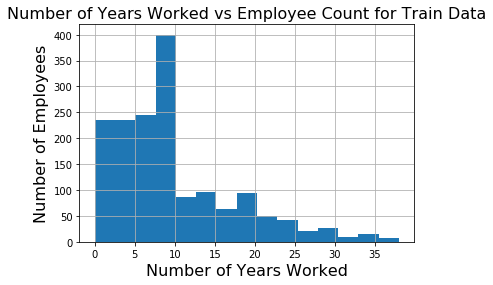

In [54]:
ax1 = train_df['TotalWorkingYears'].hist(bins=15)
ax1.set_xlabel("Number of Years Worked", fontsize=16)
ax1.set_ylabel("Number of Employees", fontsize=16)
ax1.set_title("Number of Years Worked vs Employee Count for Train Data", fontsize=16)

Text(0.5, 1.0, 'Number of Years Worked vs Employee Count for Test data')

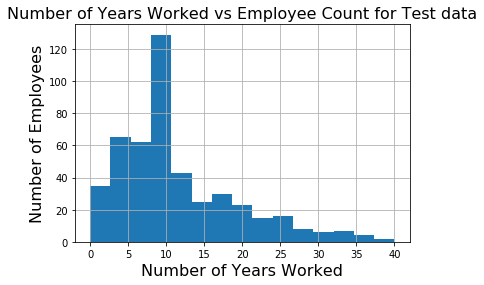

In [55]:
ax2 = test_df['TotalWorkingYears'].hist(bins=15)
ax2.set_xlabel("Number of Years Worked", fontsize=16)
ax2.set_ylabel("Number of Employees", fontsize=16)
ax2.set_title("Number of Years Worked vs Employee Count for Test data", fontsize=16)

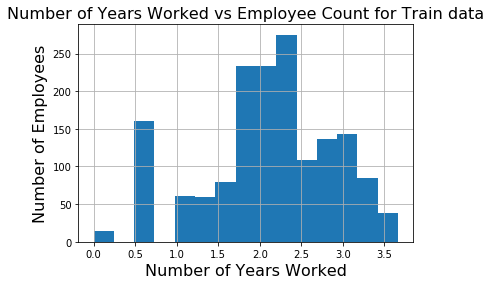

In [56]:
# Normalized data for number of years worked
data_years_worked = np.log(train_df['TotalWorkingYears']+1)
ax1 = data_years_worked.hist(bins=15)
ax1.set_xlabel("Number of Years Worked", fontsize=16)
ax1.set_ylabel("Number of Employees", fontsize=16)
ax1.set_title("Number of Years Worked vs Employee Count for Train data", fontsize=16)
ax1

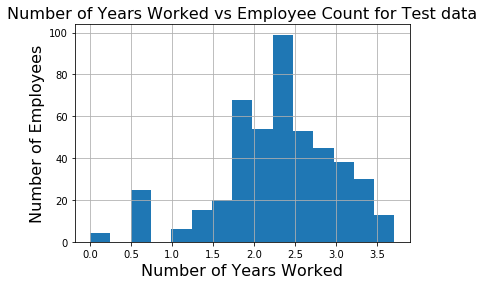

In [57]:
# Normalized data for number of years worked
data_years_worked = np.log(test_df['TotalWorkingYears']+1)
ax2 = data_years_worked.hist(bins=15)
ax2.set_xlabel("Number of Years Worked", fontsize=16)
ax2.set_ylabel("Number of Employees", fontsize=16)
ax2.set_title("Number of Years Worked vs Employee Count for Test data", fontsize=16)
ax2

In [58]:
train_df['TotalWorkingYears']= np.log(train_df['TotalWorkingYears']+1)
test_df['TotalWorkingYears']= np.log(test_df['TotalWorkingYears']+1)

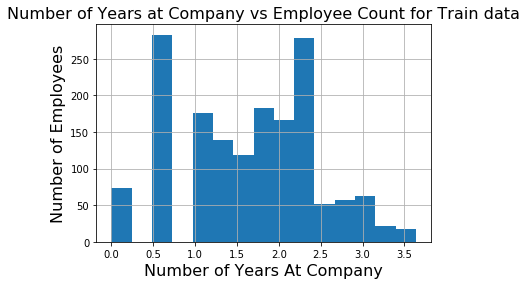

In [59]:
# Normalized data for number of years at company
data_years_worked = np.log(train_df['YearsAtCompany']+1)
ax1 = data_years_worked.hist(bins=15)
ax1.set_xlabel("Number of Years At Company", fontsize=16)
ax1.set_ylabel("Number of Employees", fontsize=16)
ax1.set_title("Number of Years at Company vs Employee Count for Train data", fontsize=16)
ax1

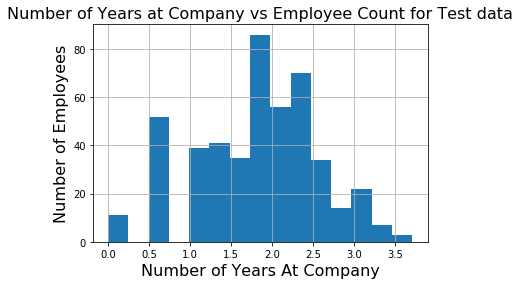

In [60]:
# Normalized data for number of years at company
data_years_worked = np.log(test_df['YearsAtCompany']+1)
ax2 = data_years_worked.hist(bins=15)
ax2.set_xlabel("Number of Years At Company", fontsize=16)
ax2.set_ylabel("Number of Employees", fontsize=16)
ax2.set_title("Number of Years at Company vs Employee Count for Test data", fontsize=16)
ax2

In [61]:
train_df['YearsAtCompany']= np.log(train_df['YearsAtCompany']+1)
test_df['YearsAtCompany']= np.log(test_df['YearsAtCompany']+1)

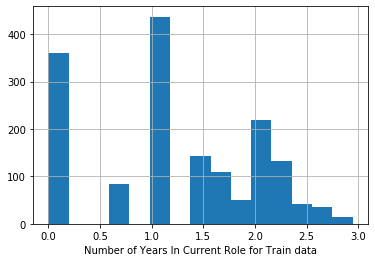

In [62]:
#Normalize Number of Years In Current Role
data_years_worked = np.log(train_df['YearsInCurrentRole']+1)
ax1 = data_years_worked.hist(bins=15)
ax1.set_xlabel("Number of Years In Current Role for Train data")
ax1

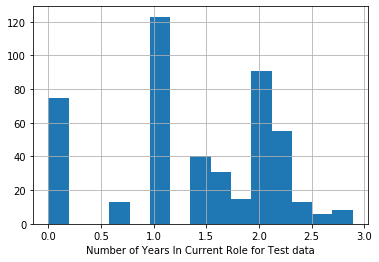

In [63]:
#Normalize Number of Years In Current Role
data_years_worked = np.log(test_df['YearsInCurrentRole']+1)
ax2 = data_years_worked.hist(bins=15)
ax2.set_xlabel("Number of Years In Current Role for Test data")
ax2

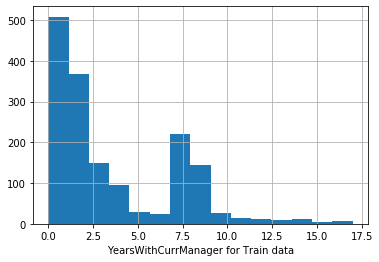

In [64]:
#Historgram of Number of Years with Current Manager at Company vs Employee Count
ax1 = train_df['YearsWithCurrManager'].hist(bins=15)
ax1.set_xlabel("YearsWithCurrManager for Train data")
ax1

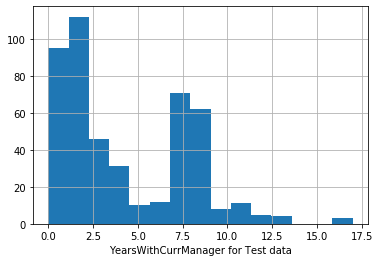

In [65]:
#Historgram of Number of Years with Current Manager at Company vs Employee Count
ax2 = test_df['YearsWithCurrManager'].hist(bins=15)
ax2.set_xlabel("YearsWithCurrManager for Test data")
ax2

In [66]:
x_train = train.drop(['Attrition','EmployeeNumber'], axis=1)
y_train = train['Attrition']
train_col = [col for col in x_train.columns if x_train[col].dtype=='object']
train_col

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [67]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
ohe_x_train = pd.DataFrame(ohe.fit_transform(x_train[train_col]))
ohe_x_train.index = x_train.index
x_train_num = x_train.drop(train_col, axis=1)
x_train = pd.concat([x_train_num, ohe_x_train], axis=1)
x_train.drop('Id', axis=1, inplace=True)
x_train.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,...,18,19,20,21,22,23,24,25,26,27
0,30,2,3,3,3,4,2564,0,14,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,36,12,4,3,3,3,4663,9,12,3,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,55,2,1,3,3,4,5160,4,16,3,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,39,24,1,1,3,4,4108,7,13,3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,37,3,3,3,3,3,9434,1,15,3,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [68]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x_train,y_train)

C:\Users\JISHNU\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [69]:
print(model.feature_importances_)

[0.03761335 0.02782597 0.02684521 0.0327403  0.02758596 0.03912402
 0.02868076 0.02712574 0.03159637 0.0122698  0.03328723 0.03100239
 0.02818517 0.03749655 0.04154825 0.02876959 0.02758769 0.03202903
 0.         0.0078059  0.02343513 0.01323795 0.00569324 0.01816445
 0.00856327 0.00248915 0.01777562 0.00885047 0.016549   0.00676186
 0.01074676 0.01647175 0.01843589 0.0160321  0.00485255 0.01631803
 0.00773437 0.01724072 0.0126417  0.01362389 0.01139324 0.02349707
 0.01108215 0.01564082 0.02685115 0.02576919 0.07102919]


In [70]:
feat_importances = pd.Series(model.feature_importances_, index=x_train.columns)
top30 = list(feat_importances.nlargest(28).index)
top30

[27,
 'YearsInCurrentRole',
 'JobSatisfaction',
 'Age',
 'YearsAtCompany',
 'StockOptionLevel',
 'EnvironmentSatisfaction',
 'CommunicationSkill',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'YearsSinceLastPromotion',
 'MonthlyIncome',
 'TrainingTimesLastYear',
 'DistanceFromHome',
 'YearsWithCurrManager',
 'JobInvolvement',
 'NumCompaniesWorked',
 25,
 'Education',
 26,
 22,
 1,
 13,
 4,
 7,
 18,
 9,
 12]

In [71]:
x_top30 = x_train[top30]
x_top30.head()

,27,YearsInCurrentRole,JobSatisfaction,Age,YearsAtCompany,StockOptionLevel,EnvironmentSatisfaction,CommunicationSkill,PercentSalaryHike,TotalWorkingYears,...,Education,26,22,1,13,4,7,18,9,12
0,0.0,7,4,30,11,0,3,4,14,12,...,3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,1.0,2,3,36,3,2,3,2,12,7,...,4,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
2,0.0,7,4,55,9,0,3,5,16,12,...,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,7,4,39,7,0,1,4,13,18,...,1,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
4,0.0,7,3,37,10,1,3,1,15,10,...,3,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [72]:
from sklearn.model_selection import train_test_split
x_train, cvx_test, y_train, cvy_test = train_test_split(x_top30, y_train, test_size=0.2, random_state=420)

In [26]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=10,n_estimators=200, criterion='entropy', random_state=420)
model.fit(x_train, y_train)
predict_train = model.predict_proba(x_train)[:,1]
predict_test  = model.predict_proba(cvx_test)[:,1]

model.score(cvx_test, cvy_test)

0.9662576687116564

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(cvy_test, model.predict(cvx_test))

array([[149,  11],
       [  0, 166]], dtype=int64)

In [28]:
confusion_matrix(y_train, model.predict(x_train))

array([[682,   1],
       [  0, 619]], dtype=int64)

In [40]:
x_test = test.drop(['EmployeeNumber'], axis=1)
test_col = [col for col in x_test.columns if x_test[col].dtype=='object']
test_col

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [41]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
ohe_x_test = pd.DataFrame(ohe.fit_transform(x_test[test_col]))
ohe_x_test.index = x_test.index
x_test_num = x_test.drop(test_col, axis=1)
x_test = pd.concat([x_test_num, ohe_x_test], axis=1)
x_test.drop('Id', axis=1, inplace=True)
x_test.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,...,18,19,20,21,22,23,24,25,26,27
0,28,9,3,4,3,4,2070,1,23,4,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,31,6,4,1,4,4,5460,4,22,4,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,6,3,3,4,1,5974,4,13,3,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,42,1,2,4,2,4,6062,9,13,3,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,45,4,2,3,3,2,4447,1,12,3,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [42]:
x_test_top30 = x_test[top30]

In [43]:
prediction = model.predict_proba(x_test_top30)[:,1]

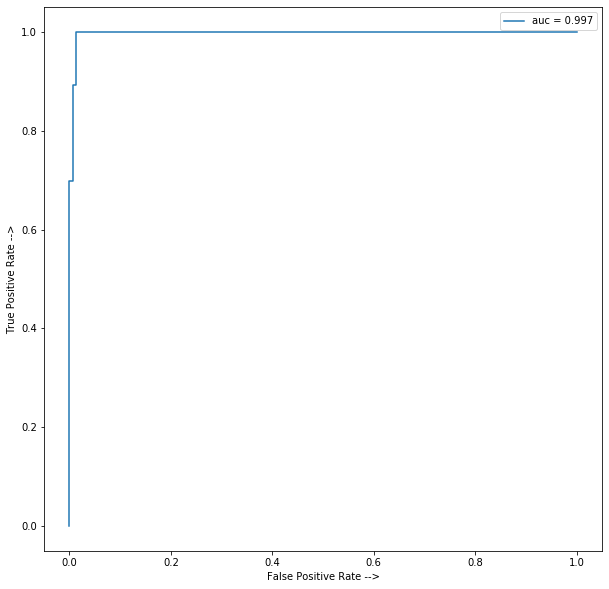

In [44]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(cvy_test, predict_test)
auc = auc(fpr, tpr)

plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, linestyle='-', label='auc = %0.3f'%auc)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()

In [45]:
output = pd.Series(prediction)
output_final = pd.concat([test['Id'], output], axis=1)
output_final.columns=['Id', 'Attrition']
output_final.set_index('Id',inplace=True)
output_final.describe()

,Attrition
count,470.000000
mean,0.255427
std,0.186233
min,0.012589
25%,0.111659
50%,0.198339
75%,0.348439
max,0.923278


In [74]:
pd.set_option('display.max_rows',470)
output_final

,Attrition
Id,
1,0.098271
2,0.088381
3,0.211038
4,0.344262
5,0.161951
6,0.186786
7,0.654071
8,0.294423
9,0.302550
